In [1]:
import sys
print(sys.executable)


C:\Users\VIVEK\OneDrive\Desktop\major project\Cardiac_Arrhythmia_Detection\venv\Scripts\python.exe


In [2]:
import seaborn as sns
print("Seaborn imported successfully!")


Seaborn imported successfully!


In [3]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: C:\Users\VIVEK\OneDrive\Desktop\major project\Cardiac_Arrhythmia_Detection\venv\Scripts\python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [5]:
df=pd.read_csv("arrhythmia.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,Sinus bradycardy
1,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,Right bundle branch block
2,55.0,0.0,175.0,94.0,100.0,202.0,380.0,179.0,143.0,28.0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,Normal heart
3,40.0,1.0,160.0,52.0,77.0,129.0,377.0,133.0,77.0,77.0,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,Normal heart
4,49.0,1.0,162.0,54.0,78.0,0.0,376.0,157.0,70.0,67.0,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,Normal heart


In [6]:

print("Shape of dataset:", df.shape)



Shape of dataset: (1715, 280)


In [7]:

print("\nColumn names:", df.columns)




Column names: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '270', '271', '272', '273', '274', '275', '276', '277', '278', '279'],
      dtype='object', length=280)


In [8]:
# Get info about data types and missing values
df.info()

# Check for missing values
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Columns: 280 entries, 0 to 279
dtypes: float64(279), object(1)
memory usage: 3.7+ MB

Missing values per column:
 0      0
1      0
2      0
3      0
4      0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 280, dtype: int64


In [9]:
df.iloc[:, -1].unique()  # Checking unique values in the last column


array(['Sinus bradycardy', 'Right bundle branch block', 'Normal heart',
       'Old Anterior Myocardial Infarction',
       'Ischemic changes (Coronary Artery Disease)',
       'Old Inferior Myocardial Infarction', 'Sinus tachycardy'],
      dtype=object)

In [10]:
df.iloc[:, -1].value_counts()


279
Sinus bradycardy                              245
Right bundle branch block                     245
Normal heart                                  245
Old Anterior Myocardial Infarction            245
Ischemic changes (Coronary Artery Disease)    245
Old Inferior Myocardial Infarction            245
Sinus tachycardy                              245
Name: count, dtype: int64

In [11]:
# Extract features and labels
X = df.iloc[:, :-1].values  # Numerical features (1715, 279)
y = df.iloc[:, -1].values   # Target labels

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)  # Convert to categorical format

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape X for CNN + LSTM (samples, time_steps, features)
X_reshaped = X_scaled.reshape(X.shape[0], X.shape[1], 1)  # (1715, 279, 1)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42, stratify=y)



In [12]:
model = Sequential()

# CNN Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(279, 1)))
model.add(MaxPooling1D(pool_size=2))

# LSTM Layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Fully Connected Layers
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_onehot.shape[1], activation='softmax'))  # Output layer

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


C:\Users\VIVEK\OneDrive\Desktop\major project\Cardiac_Arrhythmia_Detection\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 277, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 138, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 138, 50)             │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             357 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,363 (181.11 KB)

 Trainable params: 46,363 (181.11 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - accuracy: 0.2237 - loss: 1.8776 - val_accuracy: 0.3644 - val_loss: 1.6014
Epoch 2/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.3158 - loss: 1.6444 - val_accuracy: 0.4111 - val_loss: 1.4940
Epoch 3/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.3797 - loss: 1.5716 - val_accuracy: 0.4810 - val_loss: 1.3622
Epoch 4/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.4260 - loss: 1.4533 - val_accuracy: 0.5977 - val_loss: 1.2105
Epoch 5/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5339 - loss: 1.2736 - val_accuracy: 0.5131 - val_loss: 1.2367
Epoch 6/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5620 - loss: 1.1802 - val_accuracy: 0.6385 - val_loss: 1.0215
Epoch 7/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.5690 - loss: 1.1421 - val_accuracy: 0.6356 - val_loss: 1.0236
Epoch 8/30
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.6129 - loss: 1.0812 - val_accuracy: 0.6443 - v

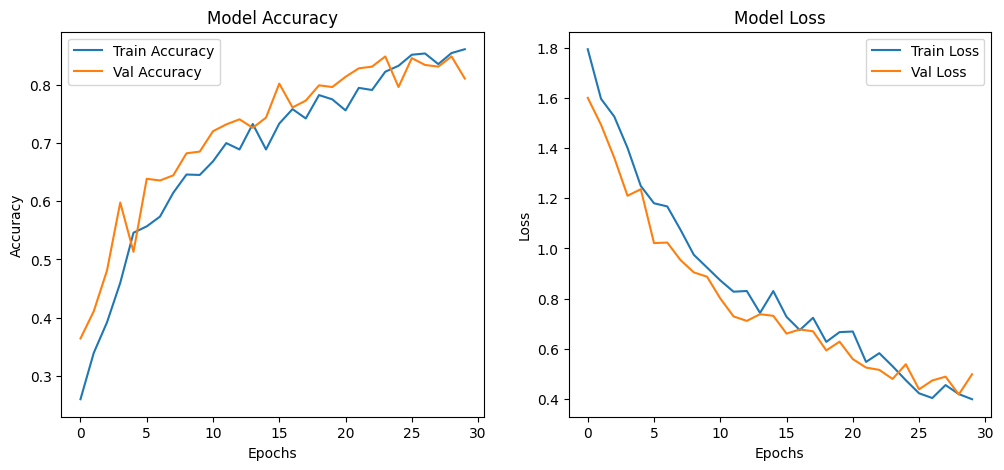

In [14]:
import matplotlib.pyplot as plt

# Plot Accuracy & Loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Model Loss")

plt.show()


In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step
                                            precision    recall  f1-score   support

Ischemic changes (Coronary Artery Disease)       0.76      0.84      0.80        49
                              Normal heart       0.57      0.24      0.34        49
        Old Anterior Myocardial Infarction       0.98      1.00      0.99        49
        Old Inferior Myocardial Infarction       0.92      0.96      0.94        49
                 Right bundle branch block       0.81      0.86      0.83        49
                          Sinus bradycardy       0.68      0.90      0.77        49
                          Sinus tachycardy       0.86      0.88      0.87        49

                                  accuracy                           0.81       343
                                 macro avg       0.80      0.81      0.79       343
                              weighted avg       0.80      0.81      0.79       343



<Axes: >

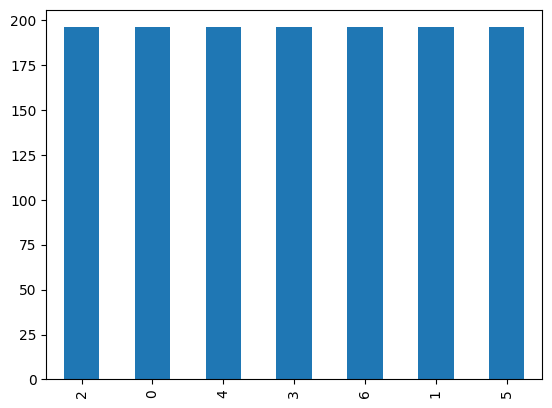

In [16]:
y_train_labels = np.argmax(y_train, axis=1)

# Plot class distribution
pd.Series(y_train_labels).value_counts().plot(kind="bar")

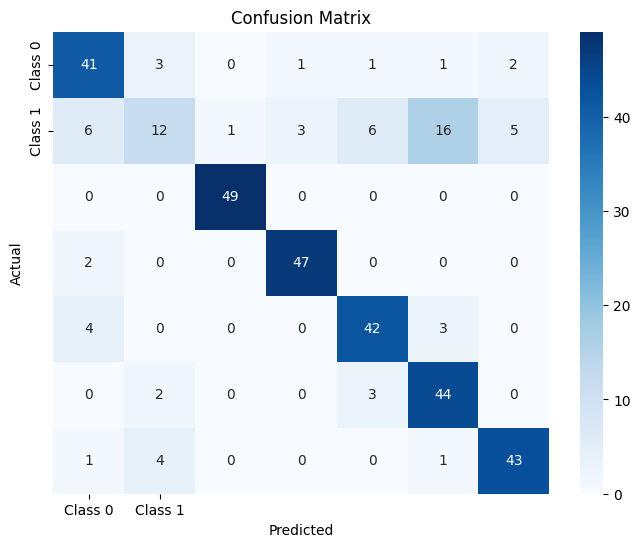

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.84      0.80        49
           1       0.57      0.24      0.34        49
           2       0.98      1.00      0.99        49
           3       0.92      0.96      0.94        49
           4       0.81      0.86      0.83        49
           5       0.68      0.90      0.77        49
           6       0.86      0.88      0.87        49

    accuracy                           0.81       343
   macro avg       0.80      0.81      0.79       343
weighted avg       0.80      0.81      0.79       343



In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure y_true and y_pred are integer class labels
y_true = np.array(y_true).astype(int)

# Convert probabilities to class labels (if needed)
if y_pred.ndim > 1 and y_pred.shape[1] > 1:
    y_pred = y_pred.argmax(axis=1)

y_pred = np.array(y_pred).astype(int)

# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
class_labels = ["Class 0", "Class 1"]  # Adjust based on your dataset

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred))


In [18]:
!where python

C:\ProgramData\Anaconda3\anaconda\python.exe
C:\Users\VIVEK\AppData\Local\Programs\Python\Python311\python.exe
C:\Users\VIVEK\AppData\Local\Microsoft\WindowsApps\python.exe


In [19]:
import sys
print(sys.executable)


C:\Users\VIVEK\OneDrive\Desktop\major project\Cardiac_Arrhythmia_Detection\venv\Scripts\python.exe


In [20]:
print(y_train.shape)  # Check shape before one-hot encoding


(1372, 7)


In [21]:
y_train = y_train.reshape(-1, 7)  # Reshape to (1372, 7)
y_test = y_test.reshape(-1, 7)    # Reshape test labels



In [23]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# If labels are already one-hot encoded but incorrectly shaped, fix it
if y_train.shape[-1] == 7 and len(y_train.shape) == 3:  
    y_train = y_train.reshape(-1, 7)
    y_test = y_test.reshape(-1, 7)

print(y_train.shape)  # Should be (num_samples, 7)
epochs = 50  # or any number of epochs you want
batch_size = 32  # if not already defined


# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


(1372, 7)
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.8506 - loss: 0.3991 - val_accuracy: 0.8251 - val_loss: 0.4832
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - accuracy: 0.8523 - loss: 0.3913 - val_accuracy: 0.8367 - val_loss: 0.4523
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8879 - loss: 0.3503 - val_accuracy: 0.8513 - val_loss: 0.4352
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5796 - loss: 1.6496 - val_accuracy: 0.6676 - val_loss: 0.9336
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.7110 - loss: 0.8624 - val_accuracy: 0.7872 - val_loss: 0.6519
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.7592 - loss: 0.6834 - val_accuracy: 0.7493 - val_loss: 0.7102
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.7648 - loss: 0.6596 - val_accuracy: 0.8280 - val_loss: 0.4944
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8249 - loss: 0.4866 - val_accuracy: 

In [25]:
from tensorflow.keras.layers import Dropout

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Dropout after first Dense layer

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout after second Dense layer

model.add(Dense(7, activation='softmax'))  # Output layer (no Dropout here)


In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9670 - loss: 0.0992 - val_accuracy: 0.9009 - val_loss: 0.3473
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.9813 - loss: 0.0803 - val_accuracy: 0.9213 - val_loss: 0.2786
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9709 - loss: 0.0824 - val_accuracy: 0.9184 - val_loss: 0.2978
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9876 - loss: 0.0437 - val_accuracy: 0.8950 - val_loss: 0.4144
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.9734 - loss: 0.0812 - val_accuracy: 0.9125 - val_loss: 0.3270
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9706 - loss: 0.0908 - val_accuracy: 0.9038 - val_loss: 0.4380
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9480 - loss: 0.1467 - val_accuracy: 0.8630 - val_loss: 0.5111
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.9345 - loss: 0.2252 - val_accuracy: 0.8717 - v

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9225 - loss: 0.3376
Test Accuracy: 0.9271, Test Loss: 0.3223


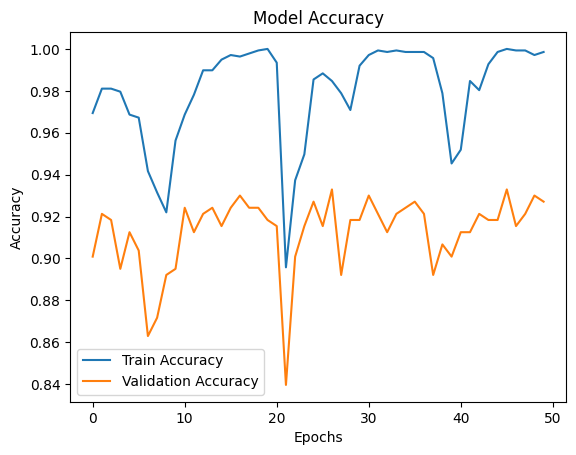

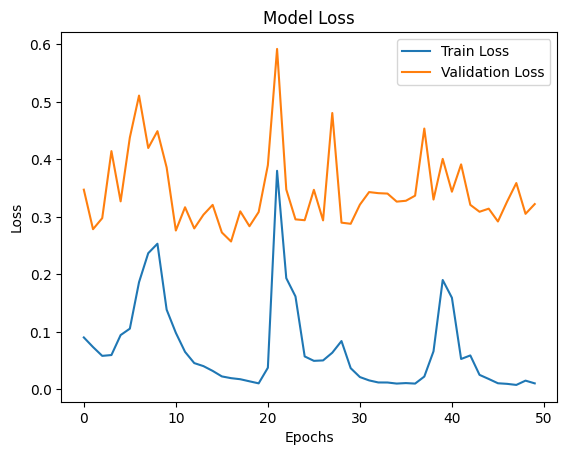

In [28]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


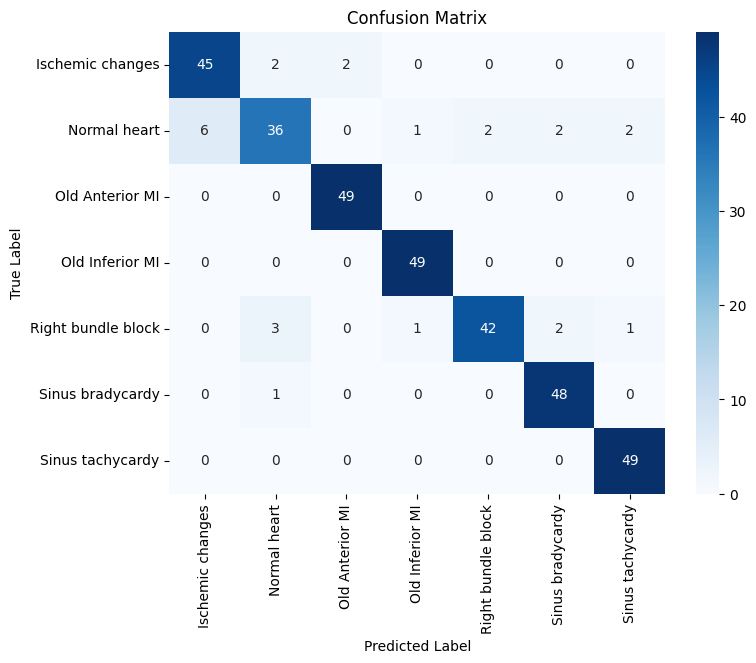

In [32]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert one-hot encoded y_test back to class labels
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class names
class_names = [
    'Ischemic changes', 'Normal heart', 'Old Anterior MI',
    'Old Inferior MI', 'Right bundle block', 'Sinus bradycardy', 'Sinus tachycardy'
]

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [33]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 92.71%


In [34]:
import tensorflow as tf

# Save the entire model
model.save("cardiac_arrhythmia_model.h5")
print("Model saved successfully.")


Model saved successfully.


In [36]:
from sklearn.metrics import classification_report
import numpy as np

# Convert one-hot encoded labels to class labels if necessary
y_true_classes = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test
y_pred_classes = np.argmax(y_pred, axis=1) if len(y_pred.shape) > 1 else y_pred

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))


              precision    recall  f1-score   support

           0       0.88      0.92      0.90        49
           1       0.86      0.73      0.79        49
           2       0.96      1.00      0.98        49
           3       0.96      1.00      0.98        49
           4       0.95      0.86      0.90        49
           5       0.92      0.98      0.95        49
           6       0.94      1.00      0.97        49

    accuracy                           0.93       343
   macro avg       0.93      0.93      0.93       343
weighted avg       0.93      0.93      0.93       343



In [37]:
import tensorflow as tf

# Save the model in the recommended Keras format
model.save("cardiac_arrhythmia_model.keras")
print("Model saved successfully.")


Model saved successfully.


In [39]:
model.save_weights("cardiac_arrhythmia.weights.h5")
print("Model weights saved successfully.")


Model weights saved successfully.


In [40]:
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)

import pandas as pd
df = pd.DataFrame(report).transpose()
df.to_csv("classification_report.csv", index=True)
print("Classification report saved as CSV.")


Classification report saved as CSV.


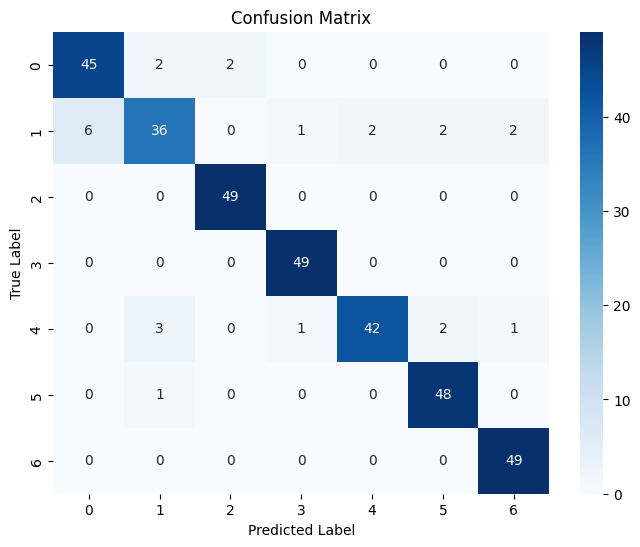

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")  # Save the plot
plt.show()


In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Sample model
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Adjust input shape
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Dummy training data (replace with real dataset)
X_train = np.random.rand(100, 4)
y_train = np.random.randint(0, 2, 100)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

# Save the model
model.save("cardiac_arrhythmia_model.h5")

print("Model saved successfully!")


C:\Users\VIVEK\OneDrive\Desktop\major project\Cardiac_Arrhythmia_Detection\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4731 - loss: 0.6982
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4945 - loss: 0.6927 
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5029 - loss: 0.6910  
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5837 - loss: 0.6818  
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4649 - loss: 0.6987
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5711 - loss: 0.6802 
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5094 - loss: 0.6928
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5293 - loss: 0.6880  
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5444 - loss: 0.6874 
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5151 - loss: 0.6921


Model saved successfully!


In [44]:
import shutil

# Source path (Jupyter's default save location)
source = r"C:\Users\VIVEK\Documents\cardiac_arrhythmia_model.h5"

# Destination path (Your Flask project folder)
destination = r"C:\Users\VIVEK\OneDrive\Desktop\major project\Cardiac_Arrhythmia_Detection\cardiac_arrhythmia_model.h5"

# Move the file
shutil.move(source, destination)
print("Model file moved successfully!")


Model file moved successfully!
